In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
from scipy.stats import norm

def plot_diff( result_name, tree, baseline, method, resolution, depth ):
    f, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
    f.set_size_inches(h=5, w=20)

    diff = tree - baseline
    
    mean, sigma = stats.norm.fit(diff[:][0])
    n, bins, patches = ax1.hist(diff[:][0], bins=60, label="r", density=True)
#    ax1.set_xlim(-5*sigma, 5*sigma)
#    ax1.set_ylim(0, np.max(n)*1.1)
    ax1.set_title(r"Distribution of error in $r$")

    gaussian = stats.norm.pdf(bins, mean, sigma)
    ax1.plot(bins, gaussian, "r-", label=r"Gaussian $\mu$=%.2e, $\sigma$=%.2e" % (mean, sigma))
    
    mean, sigma = stats.laplace.fit(diff[:][0])
    laplace = stats.laplace.pdf(bins, mean, sigma)
    ax1.plot(bins, laplace, "k-", label=r"Laplace $\mu$=%.2e, $\sigma$=%.2e" % (mean, sigma))
    ax1.legend()

    
    mean, sigma = stats.norm.fit(diff[:][1])
    n, bins, patches = ax2.hist(diff[:][1], bins=60, label="theta", density=True)
#    ax2.set_xlim(-.45e-11,0.45e-11)
#    ax2.set_ylim(0, 1e4)
    ax2.set_title(r"Distribution of error in $\theta$")
        
    gaussian = stats.norm.pdf(bins, mean, sigma)
    ax2.plot(bins, gaussian, "r-", label=r"Gaussian $\mu$=%.2e, $\sigma$=%.2e" % (mean, sigma))
    
    mean, sigma = stats.laplace.fit(diff[:][1])
    laplace = stats.laplace.pdf(bins, mean, sigma)
    ax2.plot(bins, laplace, "k-", label=r"Laplace $\mu$=%.2e, $\sigma$=%.2e" % (mean, sigma))
    ax2.legend()

    rms_r = sqrt(mean_squared_error(tree[:][0], baseline[:][0]))
    rms_t = sqrt(mean_squared_error(tree[:][1], baseline[:][1]))

    plt.suptitle( r"%s: resolution=%s depth=%s method=%s rmse($r$)=%.3e, rmse($\theta$)=%.3e" % ( result_name, resolution, depth, method, rms_r, rms_t ) )

    plt.show()


    


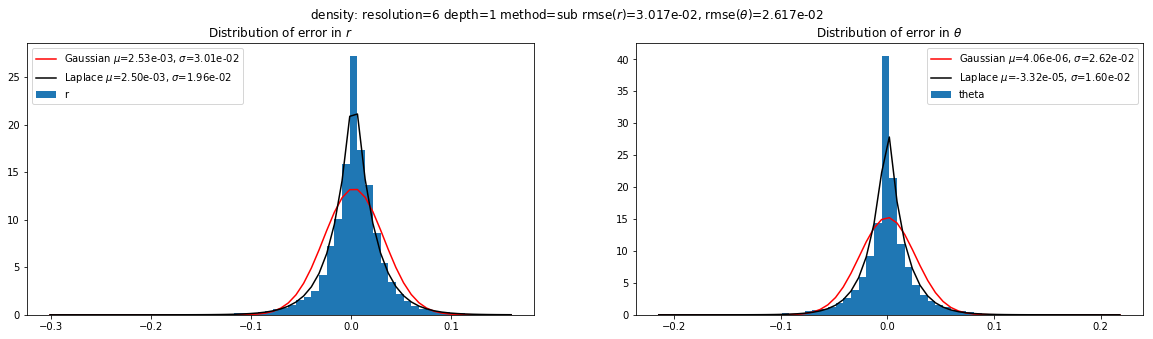

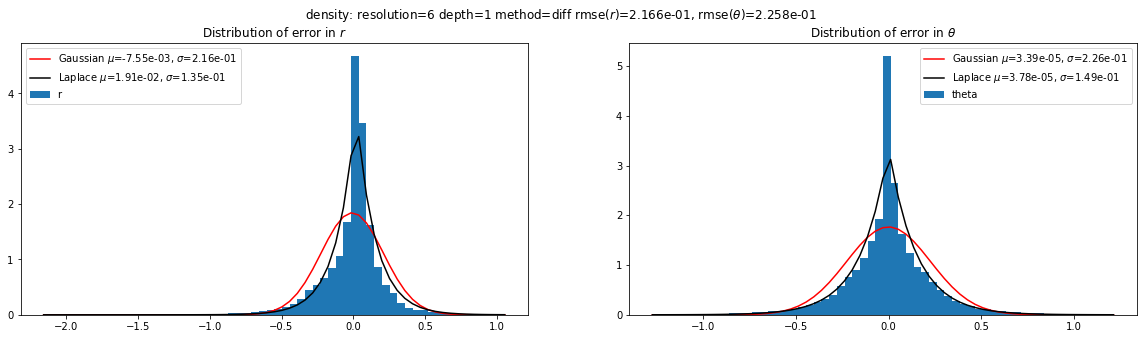

In [14]:
baseline_density = "../cmake-build-debug/result-density-20180627141315/sub-0-1.csv"

baseline = pd.read_csv( baseline_density, header=None)

result_date = "20180701191606"
result_name = "density"
for resolution in [6]:
    for depth in [1]:
        for method in ['sub', 'diff']:
            tree = pd.read_csv( "../cmake-build-debug/result-%s-%s/%s-%d-%d.csv" % (result_name, result_date, method, resolution, depth), header=None)
            plot_diff(result_name, tree, baseline, method, resolution, depth )
